# A. Importing Libraries along with a preliminary Review of Initial Data 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
og_data = pd.read_csv("leads.csv")

In [3]:
og_data.head()
og_data.shape

(9240, 37)

In [4]:
og_data["How did you hear about X Education"].value_counts(normalize=True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

In [5]:
og_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
og_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
og_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
og_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

 # B. Based on our review, there are multiple null values that need to be treated. Hence, a copy of the data is being prepared. 
#### 1. This includes renaming the column headers for ease
#### 2. Review of Null values for each field
#### 3. Splitting the data sets through 3 paramters
         a. Binary values (Yes/No)
         b. Categorical variables 
         c. Numerical variables
    

In [9]:
og_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
data=og_data.copy()

In [11]:
Rename_Headers = list(og_data.columns.values)
Corrector = lambda x:x.replace(" ","_")
Rename_Headers = list(map(Corrector,Rename_Headers))
Rename_Headers
data.columns = Rename_Headers

In [12]:
round(data.isna().sum().sort_values(ascending=False)/len(data)*100, 2)

Lead_Quality                                     51.59
Asymmetrique_Activity_Index                      45.65
Asymmetrique_Profile_Score                       45.65
Asymmetrique_Activity_Score                      45.65
Asymmetrique_Profile_Index                       45.65
Tags                                             36.29
Lead_Profile                                     29.32
What_matters_most_to_you_in_choosing_a_course    29.32
What_is_your_current_occupation                  29.11
Country                                          26.63
How_did_you_hear_about_X_Education               23.89
Specialization                                   15.56
City                                             15.37
Page_Views_Per_Visit                              1.48
TotalVisits                                       1.48
Last_Activity                                     1.11
Lead_Source                                       0.39
Receive_More_Updates_About_Our_Courses            0.00
I_agree_to

In [13]:
binary_Data_Set = data[["Do_Not_Email","Do_Not_Call","Search","Magazine","Newspaper","Newspaper_Article","X_Education_Forums","Digital_Advertisement","Through_Recommendations","Receive_More_Updates_About_Our_Courses","Update_me_on_Supply_Chain_Content","Get_updates_on_DM_Content","I_agree_to_pay_the_amount_through_cheque","A_free_copy_of_Mastering_The_Interview"]]
categorical_Data_Set = data[['Lead_Origin', 'Lead_Source',"Last_Activity",'Country',"Specialization","How_did_you_hear_about_X_Education","What_is_your_current_occupation","What_matters_most_to_you_in_choosing_a_course","Tags","Lead_Quality",'Lead_Profile','City', "Asymmetrique_Activity_Index","Asymmetrique_Profile_Index", "Last_Notable_Activity"]]
numerical_Data_Set =data[["TotalVisits","Total_Time_Spent_on_Website","Page_Views_Per_Visit","Asymmetrique_Activity_Score","Asymmetrique_Profile_Score"]]

# C. Review of  respective Features in Binary and Categorical Sets

In [14]:
for i in binary_Data_Set:
    print('Feature: ',i)
    print(round((data[i].value_counts(dropna=False)/len(data[i])*100),2))
    print('----------------------------------------------')

Feature:  Do_Not_Email
No     92.06
Yes     7.94
Name: Do_Not_Email, dtype: float64
----------------------------------------------
Feature:  Do_Not_Call
No     99.98
Yes     0.02
Name: Do_Not_Call, dtype: float64
----------------------------------------------
Feature:  Search
No     99.85
Yes     0.15
Name: Search, dtype: float64
----------------------------------------------
Feature:  Magazine
No    100.0
Name: Magazine, dtype: float64
----------------------------------------------
Feature:  Newspaper
No     99.99
Yes     0.01
Name: Newspaper, dtype: float64
----------------------------------------------
Feature:  Newspaper_Article
No     99.98
Yes     0.02
Name: Newspaper_Article, dtype: float64
----------------------------------------------
Feature:  X_Education_Forums
No     99.99
Yes     0.01
Name: X_Education_Forums, dtype: float64
----------------------------------------------
Feature:  Digital_Advertisement
No     99.96
Yes     0.04
Name: Digital_Advertisement, dtype: float64
-

In [15]:
for i in categorical_Data_Set:
    print('Feature: ',i)
    print(round((data[i].value_counts(dropna=False)/len(data[i])*100),2))
    print('----------------------------------------------')

Feature:  Lead_Origin
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead_Origin, dtype: float64
----------------------------------------------
Feature:  Lead_Source
Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
NaN                   0.39
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead_Source, dtype: float64
----------------------------------------------
Feature:  Last_Activity
Email Opene

# D. Exploratory Data Analytics

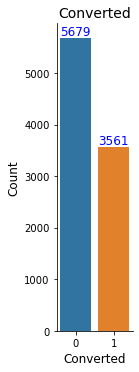

In [16]:
plot = sns.catplot(x="Converted", kind="count", data=data, aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

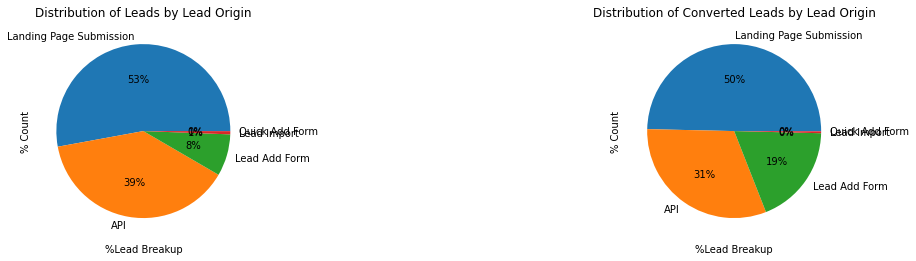

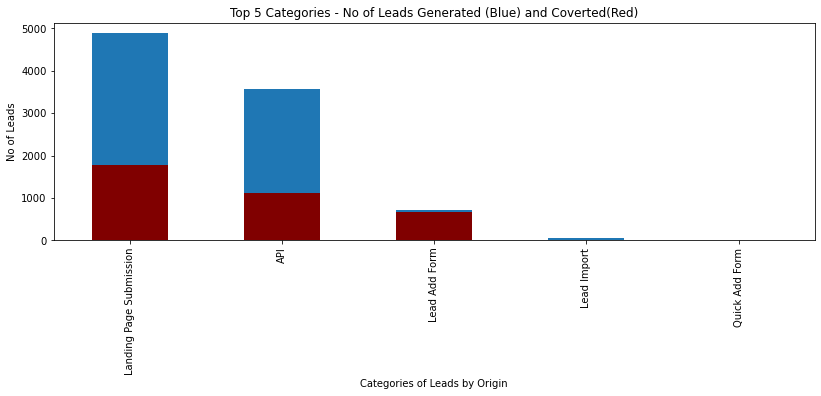

In [17]:
plt.figure(figsize=[30,4])

plt.subplot(1,3,1)
data["Lead_Origin"].value_counts(normalize=True).plot.pie(autopct='%.0f%%', title="Distribution of Leads by Lead Origin")
plt.xlabel("%Lead Breakup")
plt.ylabel("% Count")

plt.subplot(1,3,2)
(data[(data.Converted==1) & (data["Lead_Origin"])])["Lead_Origin"].value_counts(normalize=True).plot.pie(autopct='%.0f%%', title="Distribution of Converted Leads by Lead Origin")
plt.xlabel("%Lead Breakup")
plt.ylabel("% Count")
plt.show()



plt.figure(figsize=[30,4])
plt.subplot(1,2,1)
data["Lead_Origin"].value_counts().head(5).plot.bar()
plt.title("Top 5 Categories - No of Leads Generated (Blue) and Coverted(Red)") 
plt.xlabel("Categories of Leads by Origin")
plt.ylabel("No of Leads")

plt.subplot(1,2,1)
(data[(data.Converted==1) & (data["Lead_Origin"])])["Lead_Origin"].value_counts().head().plot.bar(color="maroon")
plt.show()

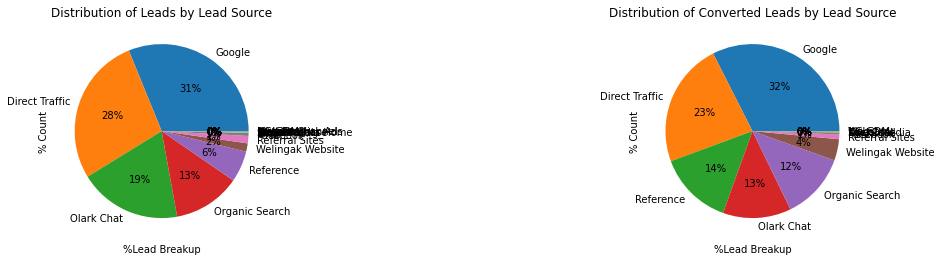

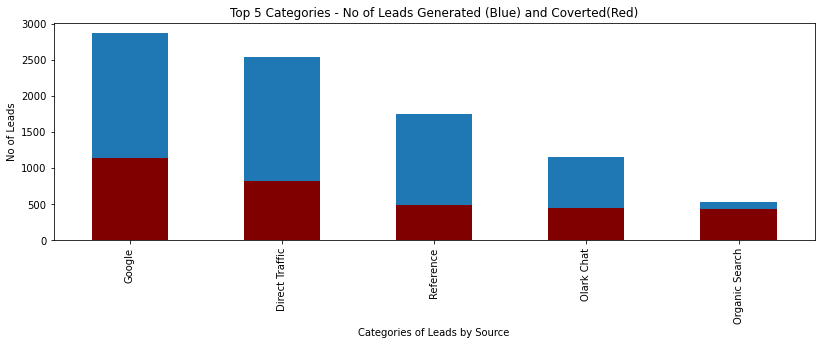

In [18]:
plt.figure(figsize=[30,4])
plt.subplot(1,3,1)
data["Lead_Source"].value_counts(normalize=True).plot.pie(autopct='%.0f%%', title="Distribution of Leads by Lead Source")
plt.xlabel("%Lead Breakup")
plt.ylabel("% Count")

plt.subplot(1,3,2)
(data[(data.Converted==1) & (data["Lead_Source"])])["Lead_Source"].value_counts(normalize=True).plot.pie(autopct='%.0f%%', title="Distribution of Converted Leads by Lead Source")
plt.xlabel("%Lead Breakup")
plt.ylabel("% Count")
plt.show()



plt.figure(figsize=[30,4])
plt.subplot(1,2,1)
data["Lead_Source"].value_counts().head().plot.bar()

plt.subplot(1,2,1)
(data[(data.Converted==1) & (data["Lead_Source"])])["Lead_Source"].value_counts().head().plot.bar(color="maroon")

plt.title("Top 5 Categories - No of Leads Generated (Blue) and Coverted(Red)") 
plt.xlabel("Categories of Leads by Source")
plt.ylabel("No of Leads")
plt.show()

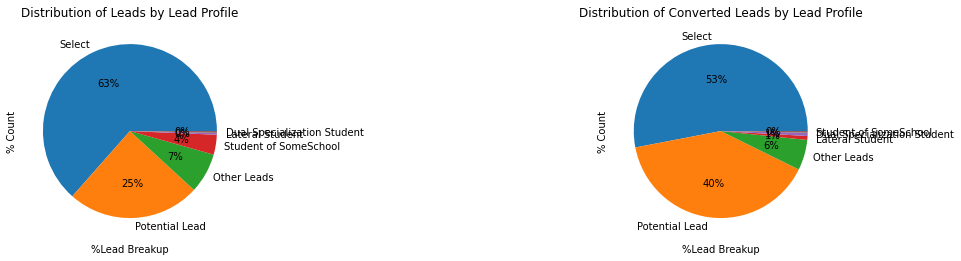

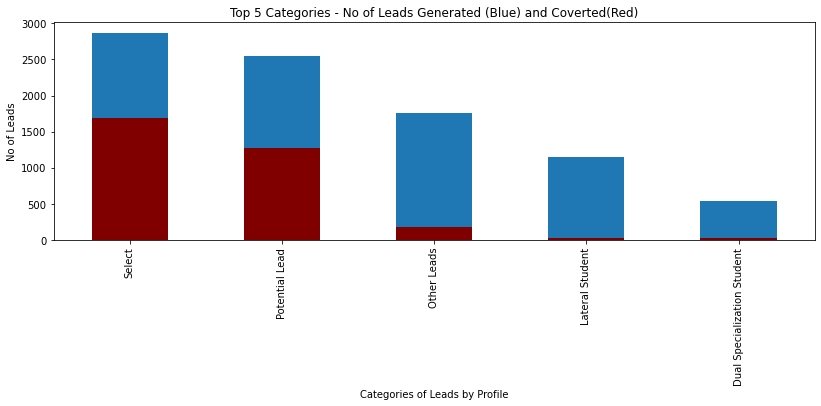

In [19]:
plt.figure(figsize=[30,4])
plt.subplot(1,3,1)
data["Lead_Profile"].value_counts(normalize=True).plot.pie(autopct='%.0f%%', title="Distribution of Leads by Lead Profile")
plt.xlabel("%Lead Breakup")
plt.ylabel("% Count")

plt.subplot(1,3,2)
(data[(data.Converted==1) & (data["Lead_Profile"])])["Lead_Profile"].value_counts(normalize=True).plot.pie(autopct='%.0f%%', title="Distribution of Converted Leads by Lead Profile")
plt.xlabel("%Lead Breakup")
plt.ylabel("% Count")
plt.show()



plt.figure(figsize=[30,4])
plt.subplot(1,2,1)
data["Lead_Source"].value_counts().head().plot.bar()

plt.subplot(1,2,1)
(data[(data.Converted==1) & (data["Lead_Profile"])])["Lead_Profile"].value_counts().head().plot.bar(color="maroon")

plt.title("Top 5 Categories - No of Leads Generated (Blue) and Coverted(Red)") 
plt.xlabel("Categories of Leads by Profile")
plt.ylabel("No of Leads")
plt.show()


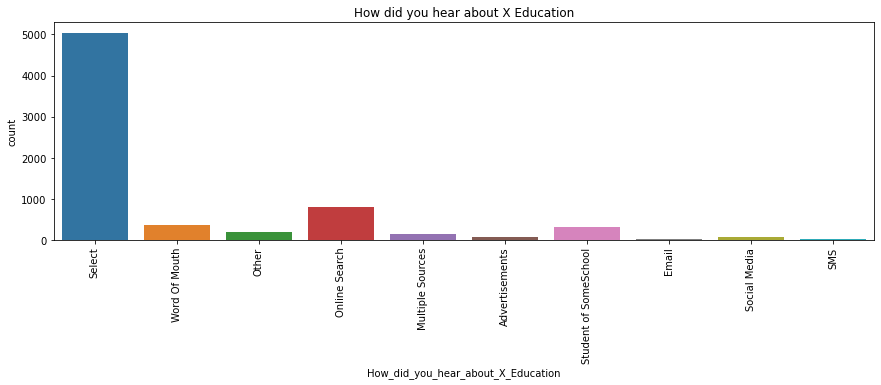

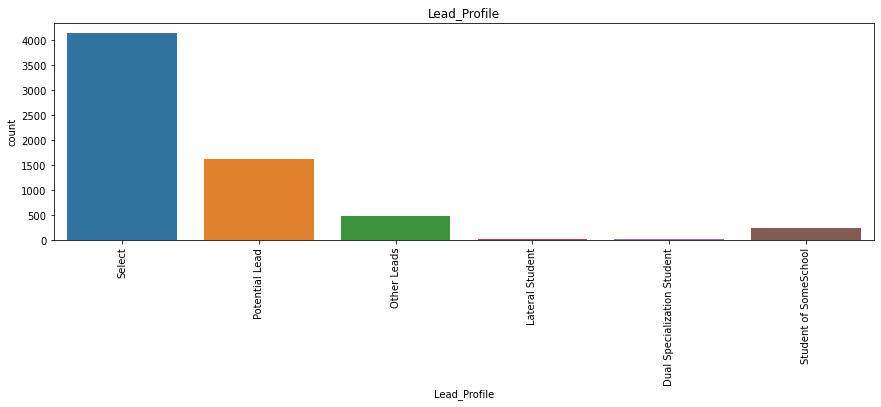

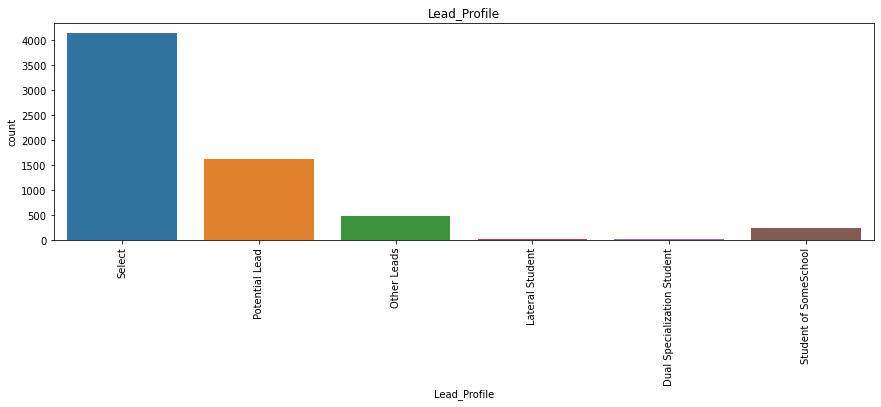

In [20]:
plt.figure(figsize=[50,4])

plt.subplot(1,3,1)
sns.countplot(data['How_did_you_hear_about_X_Education'])
plt.xticks(rotation=90)
plt.title('How did you hear about X Education')
plt.show()

plt.figure(figsize=[50,4])
plt.subplot(1,3,2)
sns.countplot(data['Lead_Profile'])
plt.xticks(rotation=90)
plt.title('Lead_Profile')
plt.show()

plt.figure(figsize=[50,4])
plt.subplot(1,3,3)
sns.countplot(data['Lead_Profile'])
plt.xticks(rotation=90)
plt.title('Lead_Profile')
plt.show()

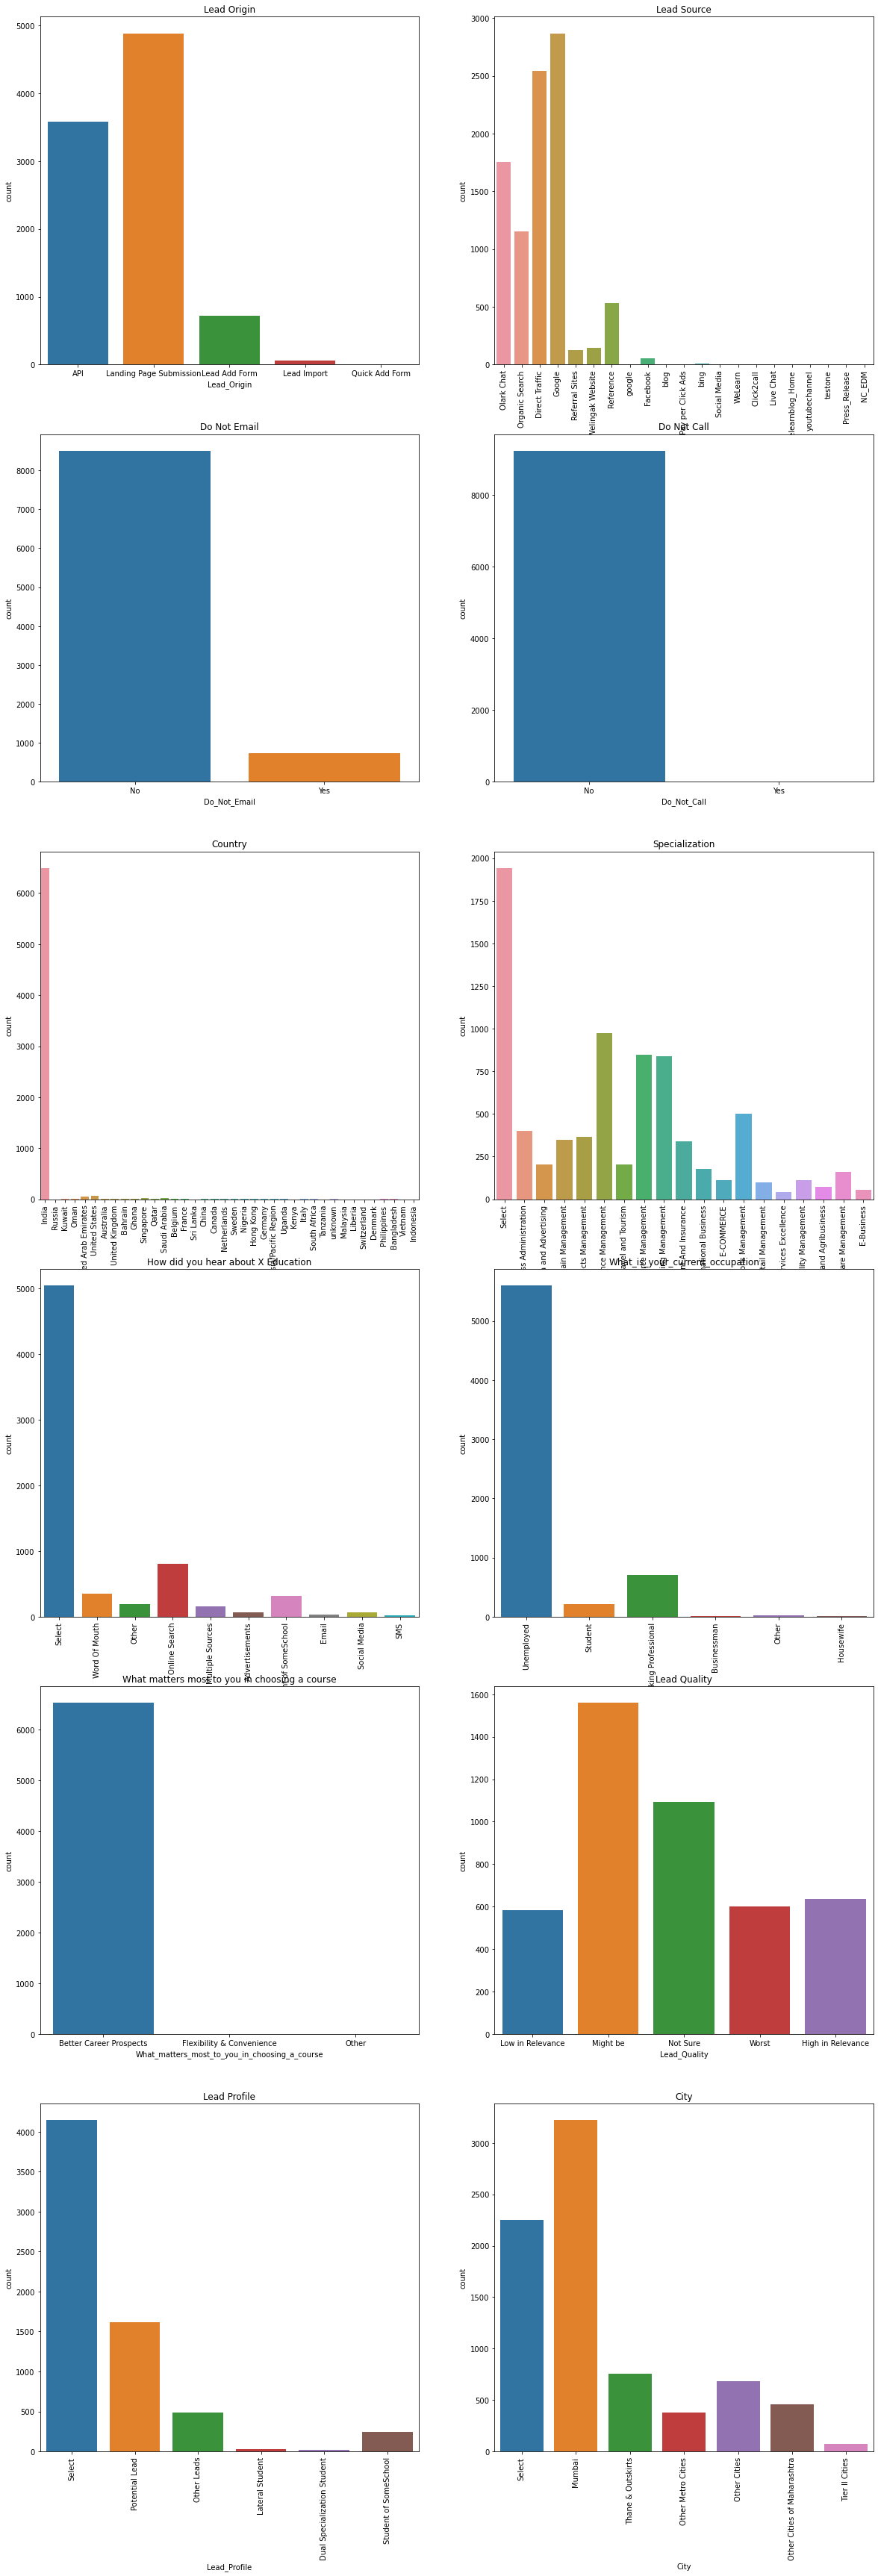

In [21]:
plt.figure(figsize = (20,60))

plt.subplot(6,2,1)
sns.countplot(data['Lead_Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(data['Lead_Source'])
plt.xticks(rotation=90)
plt.title('Lead Source')

plt.subplot(6,2,3)
sns.countplot(data['Do_Not_Email'])
plt.title('Do Not Email')

plt.subplot(6,2,4)
sns.countplot(data['Do_Not_Call'])
plt.title('Do Not Call')

plt.subplot(6,2,5)
sns.countplot(data['Country'])
plt.xticks(rotation=90)
plt.title('Country')

plt.subplot(6,2,6)
sns.countplot(data['Specialization'])
plt.xticks(rotation=90)
plt.title('Specialization')

plt.subplot(6,2,7)
sns.countplot(data['How_did_you_hear_about_X_Education'])
plt.xticks(rotation=90)
plt.title('How did you hear about X Education')

plt.subplot(6,2,8)
sns.countplot(data['What_is_your_current_occupation'])
plt.xticks(rotation=90)
plt.title('What_is_your_current_occupation')

plt.subplot(6,2,9)
sns.countplot(data['What_matters_most_to_you_in_choosing_a_course'])
plt.title('What matters most to you in choosing a course')

plt.subplot(6,2,10)
sns.countplot(data['Lead_Quality'])
plt.title('Lead Quality')

plt.subplot(6,2,11)
sns.countplot(data['Lead_Profile'])
plt.xticks(rotation=90)
plt.title('Lead Profile')

plt.subplot(6,2,12)
sns.countplot(data['City'])
plt.xticks(rotation=90)
plt.title('City')

plt.show()

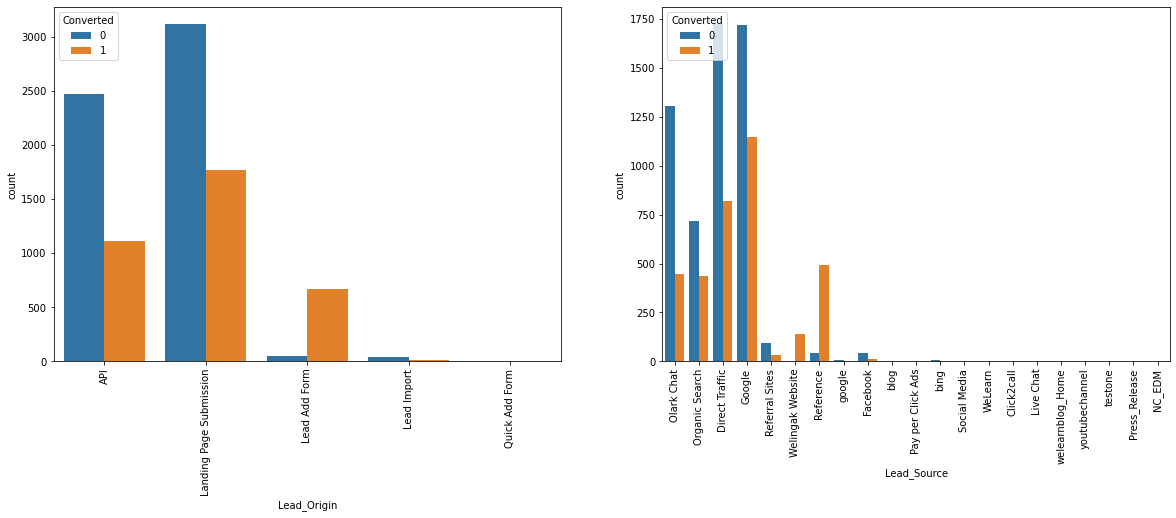

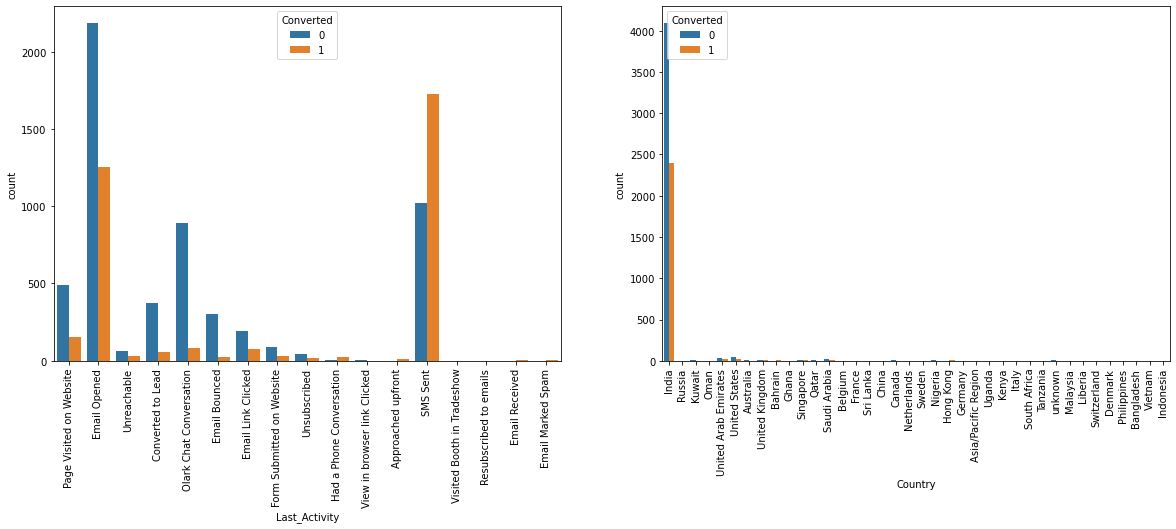

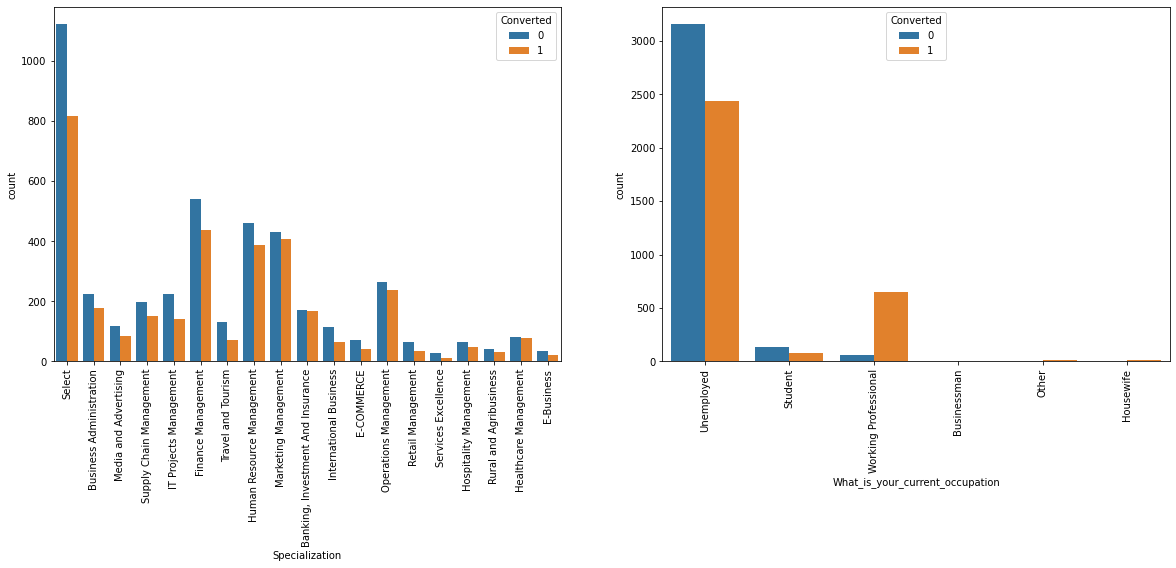

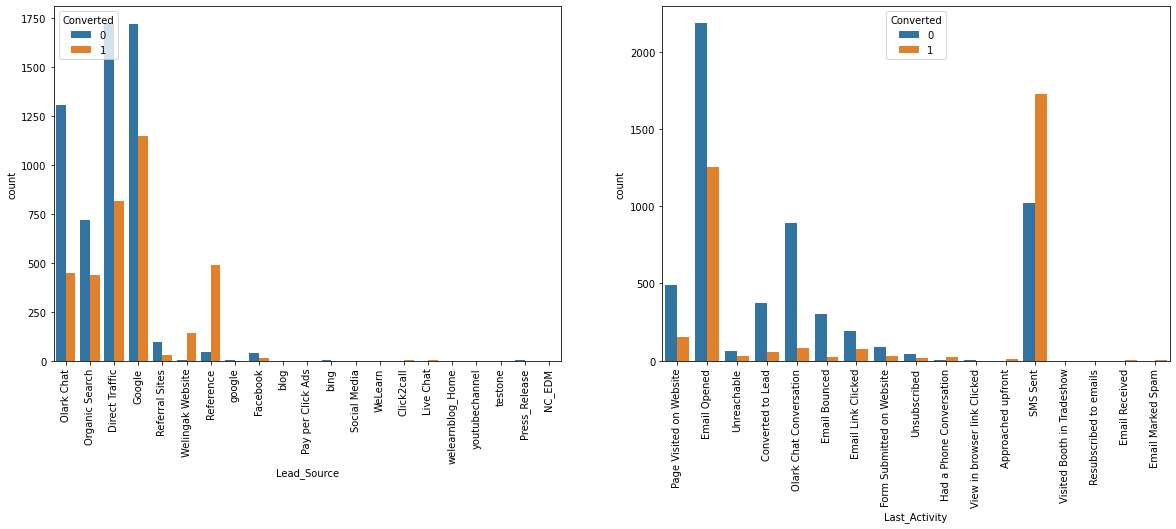

In [22]:
plt.figure(figsize = (20,30))
plt.subplot(4,2,1)
sns.countplot(x = 'Lead_Origin', hue = 'Converted', data = data)
plt.xticks(rotation = 90)

plt.subplot(4,2,2)
sns.countplot(x = 'Lead_Source', hue = 'Converted', data = data)
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize = (20,30))
plt.subplot(4,2,3)
sns.countplot(x = 'Last_Activity', hue = 'Converted', data = data)
plt.xticks(rotation = 90)

plt.subplot(4,2,4)
sns.countplot(x = 'Country', hue = 'Converted', data = data)
plt.xticks(rotation = 90)
plt.show()


plt.figure(figsize = (20,30))
plt.subplot(4,2,5)
sns.countplot(x = 'Specialization', hue = 'Converted', data = data)
plt.xticks(rotation = 90)

plt.subplot(4,2,6)
sns.countplot(x = 'What_is_your_current_occupation', hue = 'Converted', data = data)
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize = (20,30))
plt.subplot(4,2,7)
sns.countplot(x = 'Lead_Source', hue = 'Converted', data = data)
plt.xticks(rotation = 90)

plt.subplot(4,2,8)
sns.countplot(x = 'Last_Activity', hue = 'Converted', data = data)
plt.xticks(rotation = 90)
plt.show()

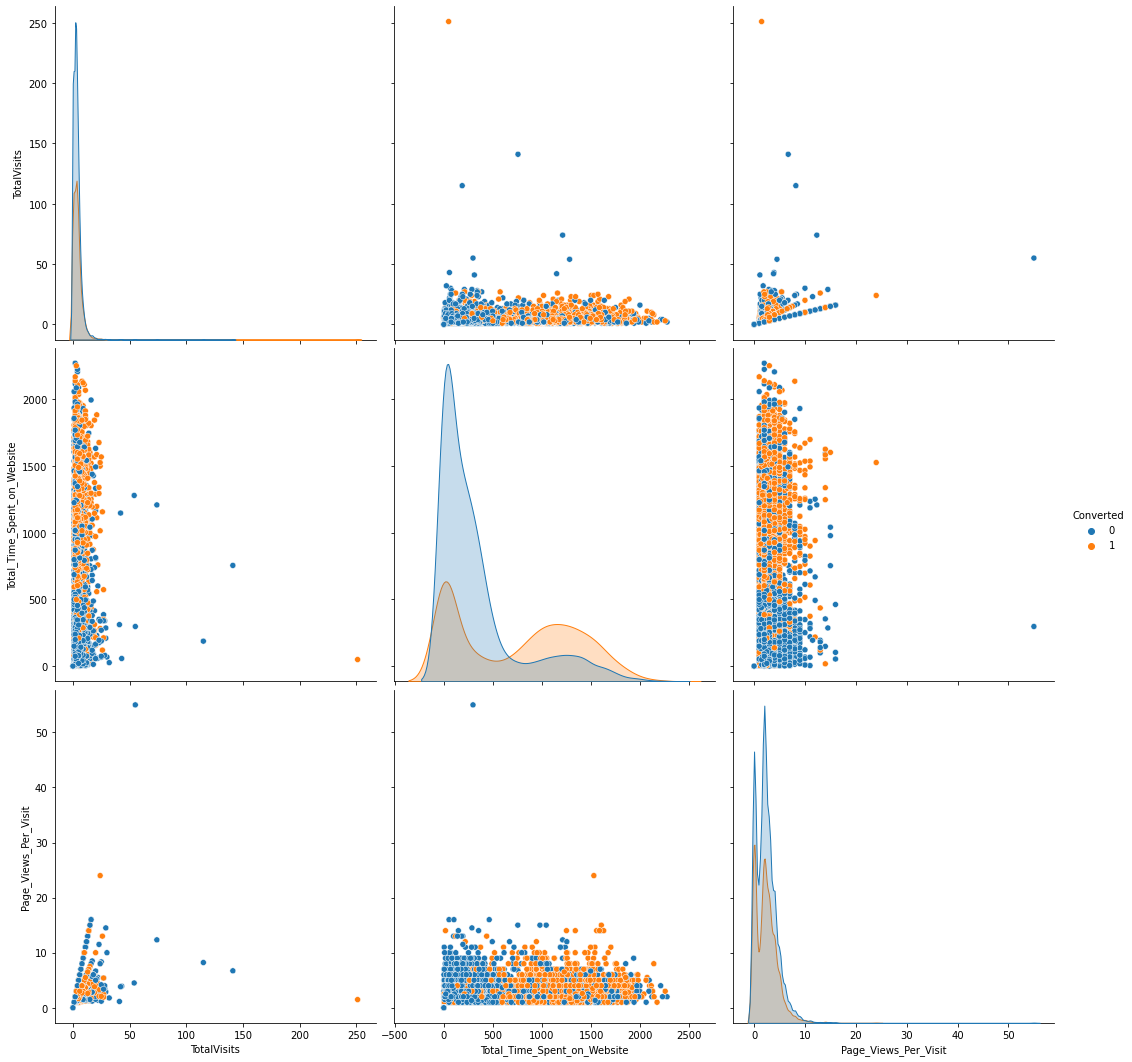

In [23]:
pplot = data[['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit',"Converted"]]
numeric_list = ['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']
sns.pairplot(pplot,hue="Converted",height=5)

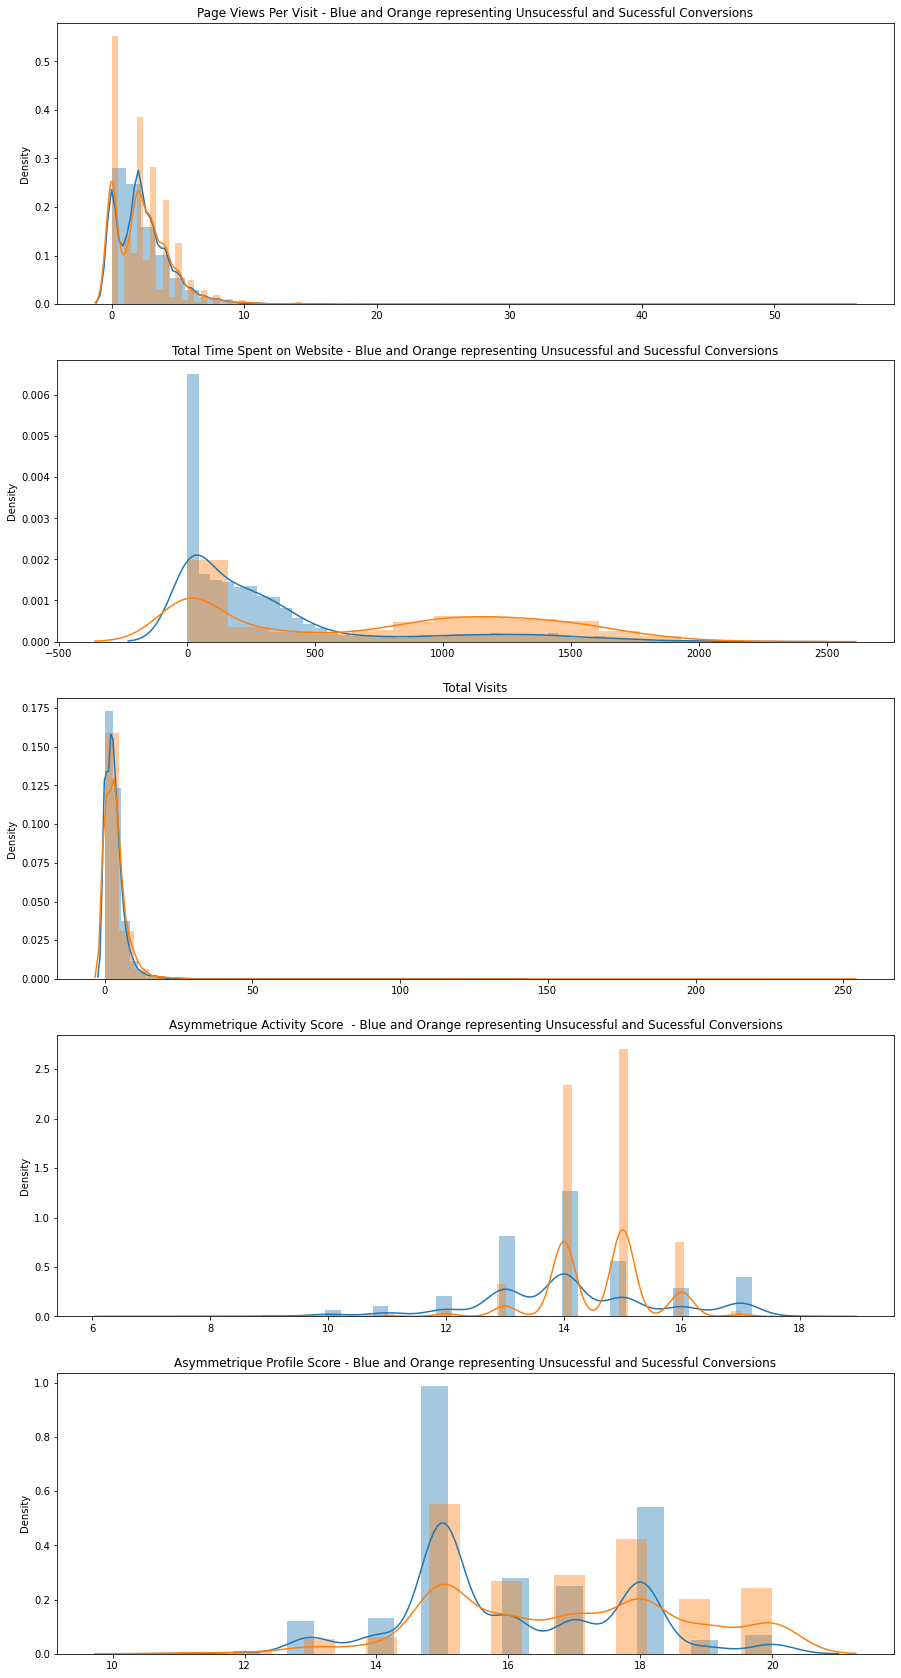

In [24]:
plt.figure(figsize =(15,30))

plt.subplot(5,1,1)
sns.distplot(data[['Page_Views_Per_Visit']][data[['Page_Views_Per_Visit',"Converted"]].Converted==0])
sns.distplot(data[['Page_Views_Per_Visit']][data[['Page_Views_Per_Visit',"Converted"]].Converted==1])
plt.title("Page Views Per Visit - Blue and Orange representing Unsucessful and Sucessful Conversions")

plt.subplot(5,1,2)
sns.distplot(data[['Total_Time_Spent_on_Website']][data[['Total_Time_Spent_on_Website',"Converted"]].Converted==0])
sns.distplot(data[['Total_Time_Spent_on_Website']][data[['Total_Time_Spent_on_Website',"Converted"]].Converted==1])
plt.title("Total Time Spent on Website - Blue and Orange representing Unsucessful and Sucessful Conversions")

plt.subplot(5,1,3)
sns.distplot(data[['TotalVisits']][data[['TotalVisits',"Converted"]].Converted==0])
sns.distplot(data[['TotalVisits']][data[['TotalVisits',"Converted"]].Converted==1])
plt.title("Total Visits")


plt.subplot(5,1,4)
sns.distplot(data[['Asymmetrique_Activity_Score']][data[['Asymmetrique_Activity_Score',"Converted"]].Converted==0])
sns.distplot(data[['Asymmetrique_Activity_Score']][data[['Asymmetrique_Activity_Score',"Converted"]].Converted==1])
plt.title("Asymmetrique Activity Score  - Blue and Orange representing Unsucessful and Sucessful Conversions")

plt.subplot(5,1,5)
sns.distplot(data[['Asymmetrique_Profile_Score']][data[['Asymmetrique_Profile_Score',"Converted"]].Converted==0])
sns.distplot(data[['Asymmetrique_Profile_Score']][data[['Asymmetrique_Profile_Score',"Converted"]].Converted==1])
plt.title("Asymmetrique Profile Score - Blue and Orange representing Unsucessful and Sucessful Conversions")

plt.show()

In [25]:
print(data.City.value_counts())
print()
print()
print(data.Country.value_counts())

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                  

## Some observations from the above EDA excercise:
    1. The customer who applied through Landing page submission are majorly identified as lead followed by API
    2. The potential buyers are found when Lead source was Google, Direct Traffic, Olak Chat, Organic Search
    3. The buyers are majorly from India and Finance management.
    3. Time spent on the website, Total Visits and No of Pages viewed have a  relation between conversions (Ref. Pairplot)
    4. Majority of the lead buyers are from Mumbai
    5. Most leads are Unemployed. A large % of indivudals claim the reason for opting the course is better career prospects
    6. Country and Cities data has inconsistencies. There are unknown cities and Other cities that do not form part of India 
    7. Smaller categorical variables across features can benefit from consolidation into a residual category called 'Others'
    8. Asymmetrique Activity Score has more diverse results in conversion of leads as opposed to Asymmetrique Profile  Score

# E. Review of Features in Binary and Categorical Sets and suggested deletions

# F. Creating the binary and categorical data sets 

### The following data modifications were made 
        1. Corrections in Asymmetrique_Activity_Index and Asymmetrique_Profile_Index
        2. Replacing the value 'Selelct' across all rows and columns with Np.Nan
        3. Convertion of Categorical Variable to a Binary Variable (for Country and What_is_your_Current_occupation)
        4. Review of Cities Data along with country where Country and City are City are both suggested for deletion
        5. Dropping of Binary variables where only one category is available (i.e 100% of the Data is Yes/No)
        6. Clubbing some categorical variables into a residual cateogory called 'Others' for each Feature
           (where the category in a feature forms less than a defined threshold of 2% of the count of all rows)
        7. If any row has 70% of the results missing, delete the row. (None found) 
        8. Placing all missing numercial values with 'Median' value and all missing categorical values with 'Mode'

In [26]:
High_Medium_Low_List =  ["Asymmetrique_Activity_Index","Asymmetrique_Profile_Index"]
def High_Medium_Low_Map(x):
    return x.map({'01.High': "High", "02.Medium": "Medium", "03.Low": "Low"})
data[High_Medium_Low_List] = data[High_Medium_Low_List].apply(High_Medium_Low_Map)

In [27]:
country_list=list(set(data.Country))
data.Country=data['Country'].replace("India","Yes")
data.Country=data['Country'].replace(np.nan,"Yes")
data.Country=data['Country'].replace(country_list,"No")


data = data.rename(columns={'Country':'Country_India'})
categorical_Data_Set = categorical_Data_Set.rename(columns={'Country':'Country_India'})

In [28]:
data = data.replace('Select', np.nan)
data['Lead_Source'] = data['Lead_Source'].replace('google', 'Google')

In [29]:
round(binary_Data_Set.isna().sum().sort_values(ascending=False)/len(data)*100, 2)

Do_Not_Email                                0.0
Do_Not_Call                                 0.0
Search                                      0.0
Magazine                                    0.0
Newspaper                                   0.0
Newspaper_Article                           0.0
X_Education_Forums                          0.0
Digital_Advertisement                       0.0
Through_Recommendations                     0.0
Receive_More_Updates_About_Our_Courses      0.0
Update_me_on_Supply_Chain_Content           0.0
Get_updates_on_DM_Content                   0.0
I_agree_to_pay_the_amount_through_cheque    0.0
A_free_copy_of_Mastering_The_Interview      0.0
dtype: float64

In [30]:
round(categorical_Data_Set.isna().sum().sort_values(ascending=False)/len(data)*100, 2)

Lead_Quality                                     51.59
Asymmetrique_Activity_Index                      45.65
Asymmetrique_Profile_Index                       45.65
Tags                                             36.29
What_matters_most_to_you_in_choosing_a_course    29.32
Lead_Profile                                     29.32
What_is_your_current_occupation                  29.11
Country_India                                    26.63
How_did_you_hear_about_X_Education               23.89
Specialization                                   15.56
City                                             15.37
Last_Activity                                     1.11
Lead_Source                                       0.39
Lead_Origin                                       0.00
Last_Notable_Activity                             0.00
dtype: float64

In [31]:
for i in range(data.shape[0]):
    if(((data.loc[i].isna().sum().sum())/data.shape[1])*100 >= 70):
        data.drop(i)

In [32]:
for i in categorical_Data_Set:
    threshold_percent=2
    series=pd.value_counts(data[i], dropna=False)
    print(series)
    mask = (series / series.sum() * 100).lt(threshold_percent)
    print(mask)
    print(series[mask].index)
    data[i] = data[i].replace(series[mask].index, 'Others')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead_Origin, dtype: int64
Landing Page Submission    False
API                        False
Lead Add Form              False
Lead Import                 True
Quick Add Form              True
Name: Lead_Origin, dtype: bool
Index(['Lead Import', 'Quick Add Form'], dtype='object')
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lea

In [33]:
for i in categorical_Data_Set:
    print('Feature: ',i)
    print(round((data[i].value_counts(dropna=False)/len(data[i])*100),2))
    print('----------------------------------------------')

Feature:  Lead_Origin
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Others                      0.61
Name: Lead_Origin, dtype: float64
----------------------------------------------
Feature:  Lead_Source
Google            31.09
Direct Traffic    27.52
Olark Chat        18.99
Organic Search    12.49
Reference          5.78
Others             4.12
Name: Lead_Source, dtype: float64
----------------------------------------------
Feature:  Last_Activity
Email Opened               37.20
SMS Sent                   29.71
Olark Chat Conversation    10.53
Page Visited on Website     6.93
Converted to Lead           4.63
Others                      4.59
Email Bounced               3.53
Email Link Clicked          2.89
Name: Last_Activity, dtype: float64
----------------------------------------------
Feature:  Country_India
Yes    96.89
No      3.11
Name: Country_India, dtype: float64
----------------------------------------------
Feature:  Spec

In [34]:
numeric_list =list( data._get_numeric_data().columns)
numeric_list.remove("Lead_Number")

for x in numeric_list:
    data[x].fillna(data[x].median(), inplace = True)
    
for x in categorical_Data_Set:
    data[x].fillna(data[x].mode()[0], inplace = True)

In [35]:
data.drop(['How_did_you_hear_about_X_Education', 'Lead_Quality','Magazine',"Receive_More_Updates_About_Our_Courses","I_agree_to_pay_the_amount_through_cheque","Update_me_on_Supply_Chain_Content","Get_updates_on_DM_Content","What_is_your_current_occupation"], axis = 1, inplace = True)

In [36]:
data

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,...,Through_Recommendations,Tags,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Interested in other courses,Potential Lead,Mumbai,Medium,Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Ringing,Potential Lead,Mumbai,Medium,Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Will revert after reading the email,Potential Lead,Mumbai,Medium,High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Ringing,Potential Lead,Mumbai,Medium,High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Will revert after reading the email,Potential Lead,Mumbai,Medium,High,15.0,18.0,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Will revert after reading the email,Potential Lead,Mumbai,Medium,High,15.0,17.0,No,Others
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Others,Potential Lead,Mumbai,Medium,High,14.0,19.0,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Others,Potential Lead,Mumbai,Medium,High,13.0,20.0,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,Will revert after reading the email,Potential Lead,Other Metro Cities,Medium,Medium,15.0,16.0,No,SMS Sent


# G. Rewriting the binary and categorical data set for Inclusions/Exlusions
####                                        This will further help in regression testing and review

In [37]:
binary_Data_Set = data[["Do_Not_Email","Do_Not_Call","Search","Newspaper","Newspaper_Article","X_Education_Forums","Digital_Advertisement","Through_Recommendations","A_free_copy_of_Mastering_The_Interview","Country_India"]]
categorical_Data_Set = data[['Lead_Origin', 'Lead_Source',"Last_Activity","Specialization","What_matters_most_to_you_in_choosing_a_course","Tags",'Lead_Profile','City', "Asymmetrique_Activity_Index","Asymmetrique_Profile_Index", "Last_Notable_Activity"]]
numerical_Data_Set =data[["TotalVisits","Total_Time_Spent_on_Website","Page_Views_Per_Visit","Asymmetrique_Activity_Score","Asymmetrique_Profile_Score"]]

In [38]:
numerical_Data_Set.describe(percentiles=[0.25, 0.5, 0.75, 0.90, .95, 0.99])

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440,14.166450,16.187446
std,4.819024,548.021466,2.145781,1.033585,1.346358
min,0.000000,0.000000,0.000000,7.000000,11.000000
25%,1.000000,12.000000,1.000000,14.000000,16.000000
50%,3.000000,248.000000,2.000000,14.000000,16.000000
75%,5.000000,936.000000,3.000000,14.000000,16.000000
90%,7.000000,1380.000000,5.000000,15.000000,18.000000
95%,10.000000,1562.000000,6.000000,16.000000,19.000000
99%,17.000000,1840.610000,9.000000,17.000000,20.000000


In [39]:
data.drop(list(binary_Data_Set.columns),1,inplace=True)
data.drop(list(categorical_Data_Set.columns),1,inplace=True)
data.drop(list(numerical_Data_Set.columns),1,inplace=True)
data.drop(["Prospect_ID","Lead_Number"],1,inplace=True)

In [40]:
data

,Converted
0,0
1,0
2,1
3,0
4,1
...,...
9235,1
9236,0
9237,0
9238,1


# H. Review of EDA results after data hygience and modifications


# I.Regression (Model Creation and Evaluation)

### The following steps were laid down
        1. Creating binary, categorical and numerical data sets based on the above logic to proceed with Regression
        2. Convertion of Yes and No values to Binary values
        3. Creating dummies for categorical variables
        4. Creating a data set specifically for regression
        5. Scaling the numercial data using the Standard Scalar
        6. Review of Corrrelation Matrix Between Variables
        7. Creation of 3 regression models. 1st based on all variables, 2nd based on 15 RFE factors, 3rd and 4th through reviews of variables with High VIF and low statistical signifcance. 

In [41]:
reg_data =data.copy()
BD_set =binary_Data_Set.copy()
CD_set= categorical_Data_Set.copy()
ND_set= numerical_Data_Set.copy()

In [42]:
def Binary_Map(x):
    return x.map({'Yes': 1, "No": 0})
BD_set = BD_set.apply(Binary_Map)

In [43]:
CD_set = pd.get_dummies(CD_set, drop_first=True)

In [44]:
reg_data = pd.concat([reg_data, BD_set], axis=1)
reg_data = pd.concat([reg_data, CD_set], axis=1)
reg_data = pd.concat([reg_data, ND_set], axis=1)

In [45]:
BD_set.isna().sum()

Do_Not_Email                              0
Do_Not_Call                               0
Search                                    0
Newspaper                                 0
Newspaper_Article                         0
X_Education_Forums                        0
Digital_Advertisement                     0
Through_Recommendations                   0
A_free_copy_of_Mastering_The_Interview    0
Country_India                             0
dtype: int64

In [46]:
reg_data.head()

,Converted,Do_Not_Email,Do_Not_Call,Search,Newspaper,Newspaper_Article,X_Education_Forums,Digital_Advertisement,Through_Recommendations,A_free_copy_of_Mastering_The_Interview,...,Asymmetrique_Profile_Index_Others,Last_Notable_Activity_Modified,Last_Notable_Activity_Others,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.0,0,0.0,15.0,15.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5.0,674,2.5,15.0,15.0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,2.0,1532,2.0,14.0,20.0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1.0,305,1.0,13.0,17.0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2.0,1428,1.0,15.0,18.0


In [47]:
X = reg_data.drop(['Converted'], axis=1)
y = reg_data['Converted']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
scaler = StandardScaler()

In [49]:
X_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit',"Asymmetrique_Activity_Score","Asymmetrique_Profile_Score"]] = scaler.fit_transform(X_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit',"Asymmetrique_Activity_Score","Asymmetrique_Profile_Score"]])

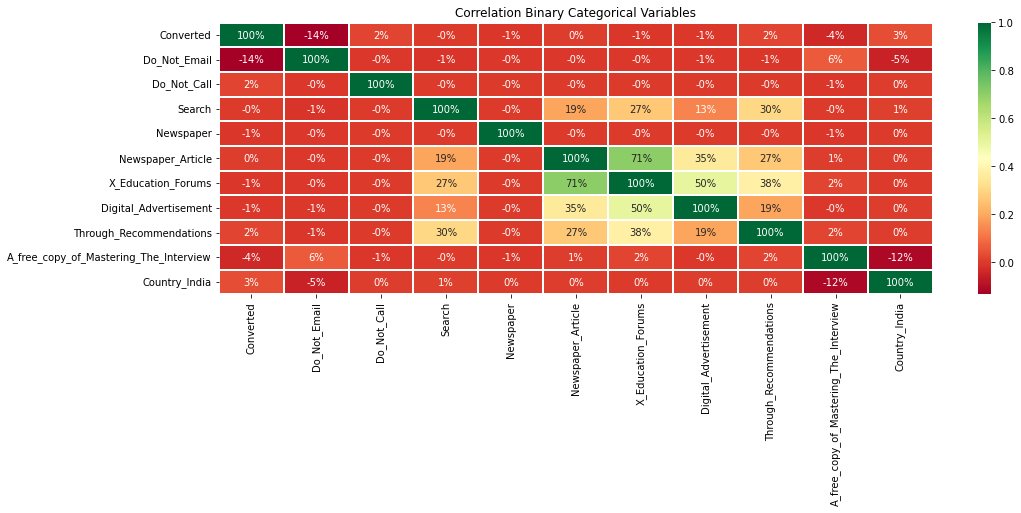

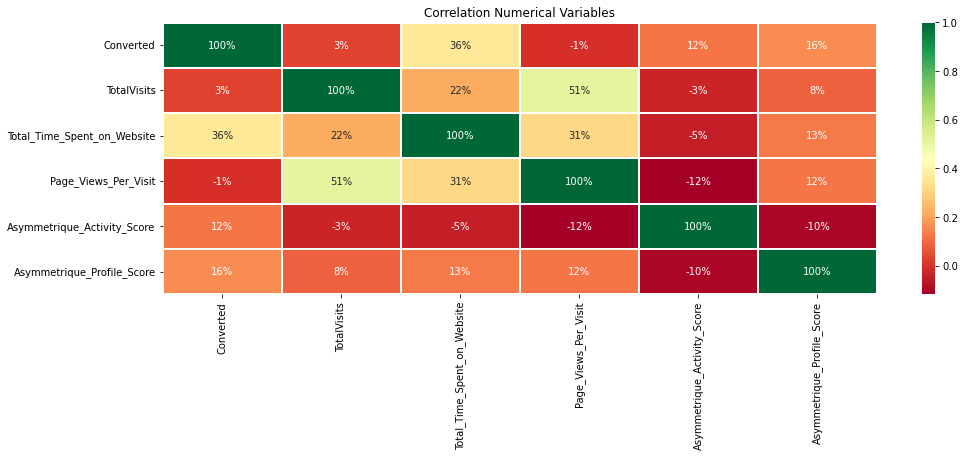

In [50]:
plt.subplots(figsize=(16, 5))
sns.heatmap((pd.concat([data,BD_set], axis=1)).corr(),linewidths=0.2,annot=True,cmap="RdYlGn",fmt='0.0%')
plt.title("Correlation Binary Categorical Variables")
plt.show()



plt.subplots(figsize=(16, 5))
sns.heatmap((pd.concat([data, ND_set], axis=1)).corr(),linewidths=0.2,annot=True,cmap="RdYlGn",fmt='0.0%')
plt.title("Correlation Numerical Variables")
plt.show()

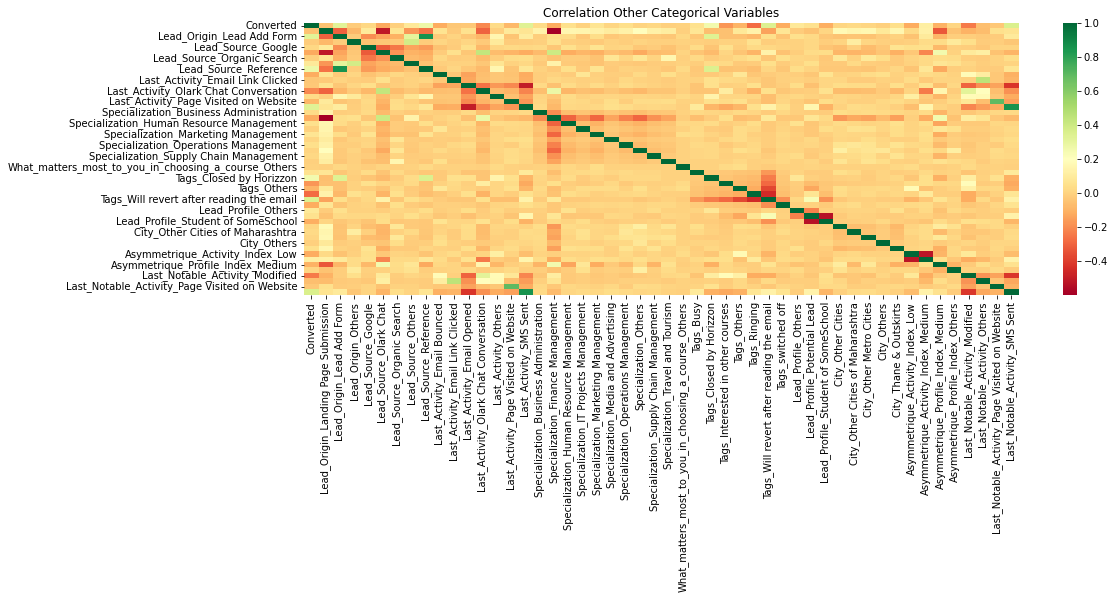

,Converted,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Others,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Last_Activity_Email Bounced,...,City_Others,City_Thane & Outskirts,Asymmetrique_Activity_Index_Low,Asymmetrique_Activity_Index_Medium,Asymmetrique_Profile_Index_Medium,Asymmetrique_Profile_Index_Others,Last_Notable_Activity_Modified,Last_Notable_Activity_Others,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
Converted,100.0,-5.0,32.0,-2.0,2.0,-13.0,-1.0,8.0,27.0,-12.0,...,-1.0,4.0,-12.0,12.0,-10.0,1.0,-24.0,-6.0,-4.0,35.0
Lead_Origin_Landing Page Submission,-5.0,100.0,-31.0,-8.0,9.0,-51.0,6.0,-17.0,-26.0,6.0,...,8.0,15.0,2.0,12.0,-34.0,-5.0,-10.0,-7.0,5.0,6.0
Lead_Origin_Lead Add Form,32.0,-31.0,100.0,-2.0,-19.0,-14.0,-11.0,31.0,85.0,-3.0,...,-2.0,-0.0,-5.0,9.0,-9.0,-2.0,-1.0,-3.0,-2.0,9.0
Lead_Origin_Others,-2.0,-8.0,-2.0,100.0,-5.0,-4.0,-3.0,38.0,-2.0,1.0,...,-1.0,-1.0,-1.0,3.0,3.0,9.0,4.0,-2.0,-1.0,-4.0
Lead_Source_Google,2.0,9.0,-19.0,-5.0,100.0,-33.0,-25.0,-14.0,-17.0,-5.0,...,-4.0,6.0,4.0,5.0,-8.0,-1.0,-2.0,-3.0,0.0,0.0
Lead_Source_Olark Chat,-13.0,-51.0,-14.0,-4.0,-33.0,100.0,-18.0,-10.0,-12.0,-2.0,...,-4.0,-11.0,-3.0,-21.0,26.0,0.0,9.0,12.0,-5.0,-10.0
Lead_Source_Organic Search,-1.0,6.0,-11.0,-3.0,-25.0,-18.0,100.0,-8.0,-9.0,2.0,...,3.0,-3.0,0.0,2.0,4.0,3.0,-2.0,-2.0,-0.0,4.0
Lead_Source_Others,8.0,-17.0,31.0,38.0,-14.0,-10.0,-8.0,100.0,-5.0,-1.0,...,-2.0,-3.0,0.0,2.0,7.0,5.0,1.0,-1.0,-0.0,1.0
Lead_Source_Reference,27.0,-26.0,85.0,-2.0,-17.0,-12.0,-9.0,-5.0,100.0,-3.0,...,-2.0,1.0,-5.0,8.0,-13.0,-1.0,-0.0,-2.0,-2.0,7.0
Last_Activity_Email Bounced,-12.0,6.0,-3.0,1.0,-5.0,-2.0,2.0,-1.0,-3.0,100.0,...,4.0,-0.0,1.0,3.0,2.0,-0.0,18.0,11.0,-4.0,-11.0


In [51]:
plt.subplots(figsize=(16, 5))
sns.heatmap((pd.concat([data, CD_set], axis=1)).corr(),cmap="RdYlGn",fmt='0.0%')
plt.title("Correlation Other Categorical Variables")
plt.show()

round((pd.concat([data, CD_set], axis=1)).corr()*100,0)

# Model - 1 (All Variables)

In [52]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6403
Model Family:                Binomial   Df Model:                           64
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1806.3
Date:                Tue, 18 Oct 2022   Deviance:                       3612.6
Time:                        05:17:51   Pearson chi2:                 1.21e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.5828      1.038     -7.308      0.000      -9.616      -5.549
Do_Not_Email                                            -1.2921      0.236     -5.482      0.000      -1.754      -0.830
Do_Not_Call                                             18.9011   3.12e+04      0.001      1.000   -6.12e+04    6.13e+04
Search                                                   0.5465      1.240      0.441      0.660      -1.885       2.978
Newspaper                                              -19.2295   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Newspaper_Article                                       22.2474   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
X_Education_Forums                                     -26.4220   7.34e+04     -0.000      1.000   -1.44e+05    1.44e+05
Digital_Advertisement                                  -22.4327   2.73e+04     -0.001      0.999   -5.36e+04    5.35e+04
Through_Recommendations                                  4.3719      1.839      2.377      0.017       0.768       7.976
A_free_copy_of_Mastering_The_Interview                  -0.0762      0.136     -0.559      0.576      -0.343       0.191
Country_India                                            0.3704      0.256      1.444      0.149      -0.132       0.873
Lead_Origin_Landing Page Submission                     -0.9316      0.160     -5.830      0.000      -1.245      -0.618
Lead_Origin_Lead Add Form                                2.6404      0.550      4.797      0.000       1.562       3.719
Lead_Origin_Others                                      -0.3968      0.664     -0.597      0.550      -1.699       0.905
Lead_Source_Google                                       0.0837      0.146      0.575      0.565      -0.202       0.369
Lead_Source_Olark Chat                                   0.3305      0.200      1.656      0.098      -0.061       0.722
Lead_Source_Organic Search                               0.0280      0.166      0.169      0.866      -0.297       0.353
Lead_Source_Others                                       0.8189      0.350      2.342      0.019       0.134       1.504
Lead_Source_Reference                                   -0.1566      0.611     -0.256      0.798      -1.354       1.041
Last_Activity_Email Bounced                             -0.2300      0.451     -0.510      0.610      -1.113       0.653
Last_Activity_Email Link Clicked                        -0.0496      0.396     -0.125      0.900      -0.826       0.727
Last_Activity_Email Opened                               0.6778      0.290      2.338      0.019       0.110       1.246
Last_Activity_Olark Chat Conversation                   -1

In [53]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do_Not_Email', True, 1),
 ('Do_Not_Call', False, 40),
 ('Search', False, 39),
 ('Newspaper', False, 48),
 ('Newspaper_Article', False, 42),
 ('X_Education_Forums', False, 28),
 ('Digital_Advertisement', False, 5),
 ('Through_Recommendations', False, 4),
 ('A_free_copy_of_Mastering_The_Interview', False, 36),
 ('Country_India', False, 22),
 ('Lead_Origin_Landing Page Submission', False, 12),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Others', False, 25),
 ('Lead_Source_Google', False, 44),
 ('Lead_Source_Olark Chat', False, 21),
 ('Lead_Source_Organic Search', False, 45),
 ('Lead_Source_Others', False, 16),
 ('Lead_Source_Reference', False, 31),
 ('Last_Activity_Email Bounced', False, 27),
 ('Last_Activity_Email Link Clicked', False, 46),
 ('Last_Activity_Email Opened', True, 1),
 ('Last_Activity_Olark Chat Conversation', False, 6),
 ('Last_Activity_Others', True, 1),
 ('Last_Activity_Page Visited on Website', False, 19),
 ('Last_Activity_SMS Sent', True, 1),
 ('Speciali

In [54]:
col = X_train.columns[rfe.support_]

# Model -2 (RFE)

## As the model above has multiple variables that need further review, proceed with creating a model based on RFE of 15 factors. 

In [55]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2033.7
Date:                Tue, 18 Oct 2022   Deviance:                       4067.5
Time:                        05:17:54   Pearson chi2:                 1.01e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.0766      0.316    -16.083      0.000      -5.695      -4.458
Do_Not_Email                                -1.2578      0.184     -6.826      0.000      -1.619      -0.897
Lead_Origin_Lead Add Form                    3.3598      0.221     15.216      0.000       2.927       3.793
Last_Activity_Email Opened                   1.1027      0.106     10.391      0.000       0.895       1.311
Last_Activity_Others                         1.1678      0.216      5.401      0.000       0.744       1.592
Last_Activity_SMS Sent                       0.8904      0.159      5.611      0.000       0.579       1.201
Tags_Busy                                    2.9775      0.380      7.830      0.000       2.232       3.723
Tags_Closed by Horizzon                      8.8629      1.059      8.369      0.000       6.787      10.938
Tags_Others                                  2.8740      0.326      8.804      0.000       2.234       3.514
Tags_Ringing                                -1.1523      0.380     -3.030      0.002      -1.898      -0.407
Tags_Will revert after reading the email     3.7600      0.307     12.234      0.000       3.158       4.362
Tags_switched off                           -1.0297      0.609     -1.690      0.091      -2.224       0.165
Lead_Profile_Others                          3.7840      1.308      2.894      0.004       1.221       6.347
Asymmetrique_Activity_Index_Low             -1.5901      0.279     -5.692      0.000      -2.138      -1.043
Last_Notable_Activity_SMS Sent               2.2621      0.164     13.784      0.000       1.940       2.584
Total_Time_Spent_on_Website                  1.0343      0.042     24.629      0.000       0.952       1.117
============================================================================================================
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.22
5,Last_Activity_SMS Sent,4.20
14,Last_Notable_Activity_SMS Sent,3.73
10,Tags_Will revert after reading the email,2.85
9,Tags_Ringing,2.04
8,Tags_Others,1.72
3,Last_Activity_Email Opened,1.61
7,Tags_Closed by Horizzon,1.54
2,Lead_Origin_Lead Add Form,1.28
11,Tags_switched off,1.26


In [57]:
X_train_sm.drop("Tags_switched off",axis=1,inplace= True)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2035.4
Date:                Tue, 18 Oct 2022   Deviance:                       4070.7
Time:                        05:17:54   Pearson chi2:                 9.89e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.4157      0.279    -19.401      0.000      -5.963      -4.869
Do_Not_Email                                -1.2591      0.184     -6.842      0.000      -1.620      -0.898
Lead_Origin_Lead Add Form                    3.3734      0.222     15.200      0.000       2.938       3.808
Last_Activity_Email Opened                   1.1042      0.106     10.392      0.000       0.896       1.312
Last_Activity_Others                         1.1705      0.217      5.403      0.000       0.746       1.595
Last_Activity_SMS Sent                       0.8866      0.159      5.583      0.000       0.575       1.198
Tags_Busy                                    3.3277      0.346      9.622      0.000       2.650       4.006
Tags_Closed by Horizzon                      9.2007      1.049      8.772      0.000       7.145      11.256
Tags_Others                                  3.2154      0.290     11.087      0.000       2.647       3.784
Tags_Ringing                                -0.7980      0.344     -2.319      0.020      -1.473      -0.123
Tags_Will revert after reading the email     4.1022      0.268     15.308      0.000       3.577       4.627
Lead_Profile_Others                          3.9186      1.375      2.849      0.004       1.223       6.614
Asymmetrique_Activity_Index_Low             -1.5926      0.279     -5.703      0.000      -2.140      -1.045
Last_Notable_Activity_SMS Sent               2.2430      0.163     13.722      0.000       1.923       2.563
Total_Time_Spent_on_Website                  1.0354      0.042     24.652      0.000       0.953       1.118
============================================================================================================
"""

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.69
5,Last_Activity_SMS Sent,4.19
13,Last_Notable_Activity_SMS Sent,3.71
10,Tags_Will revert after reading the email,2.33
9,Tags_Ringing,1.78
3,Last_Activity_Email Opened,1.60
8,Tags_Others,1.56
7,Tags_Closed by Horizzon,1.47
2,Lead_Origin_Lead Add Form,1.28
4,Last_Activity_Others,1.19


# Model -3 (Review of RFE model with dropping of certain variables based on RFE and Statistical Significance)

In [59]:
# X_train_sm.drop("Tags_Ringing",axis=1,inplace= True)
# logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
# res = logm2.fit()
# res.summary()

In [60]:
# vif = pd.DataFrame()
# vif['Features'] = X_train_sm.columns
# vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

In [61]:
# X_train_sm.drop("Lead_Profile_Others",axis=1,inplace= True)
# logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
# res = logm2.fit()
# res.summary()

In [62]:
# vif = pd.DataFrame()
# vif['Features'] = X_train_sm.columns
# vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

In [63]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00240892, 0.44934068, 0.00294309, 0.15833871, 0.24490791,
       0.97690722, 0.00282862, 0.9996836 , 0.33488782, 0.97937552])

In [64]:
y_train_pred_final = pd.DataFrame({'Act_Conv':y_train.values, 'Prob_of_Conv':y_train_pred})
y_train_pred_final[y_train_pred_final.Act_Conv==1]

,Act_Conv,Prob_of_Conv
5,1,0.976907
7,1,0.999684
9,1,0.979376
10,1,0.970916
12,1,0.292461
...,...,...
6460,1,0.999355
6462,1,0.999355
6463,1,0.997905
6464,1,0.974651


In [65]:
y_train_pred_final.head()

,Act_Conv,Prob_of_Conv
0,0,0.002409
1,0,0.449341
2,0,0.002943
3,0,0.158339
4,0,0.244908


In [66]:
y_train_pred_final['Conv_val'] = y_train_pred_final.Prob_of_Conv.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Act_Conv,Prob_of_Conv,Conv_val
0,0,0.002409,0
1,0,0.449341,0
2,0,0.002943,0
3,0,0.158339,0
4,0,0.244908,0


In [67]:
confusion = metrics.confusion_matrix(y_train_pred_final.Act_Conv, y_train_pred_final.Conv_val)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("The Confusion Matrix is: ",confusion)
print()
print()
# Actual/Predicted     not_churn    churn
# not_churn              
# churn                     

#Overall Accuracy of the model
print("Overall Accuracy of the model is: ",round(metrics.accuracy_score(y_train_pred_final.Act_Conv, y_train_pred_final.Conv_val)*100,1))
print()
print()

# Sensitivity of our logistic regression model
print("Sensitivity of the model is: ",round(TP / float(TP+FN)*100,2))

# Specificity
print("Specificity of the model is:", round(TN / float(TN+FP)*100,2))


# Calculate false postive rate
print("False positive rate of the model is: ",round(((FP/ float(TN+FP))*100),2))

# positive predictive value 
print("Positive Predictive rate of the model is: ",round(TP / float(TP+FP)*100,2))

# Negative predictive value
print("Negative Predictive rate of the model is: ",round(TN / float(TN+ FN)*100,2))

The Confusion Matrix is:  [[3679  323]
 [ 494 1972]]


Overall Accuracy of the model is:  87.4


Sensitivity of the model is:  79.97
Specificity of the model is: 91.93
False positive rate of the model is:  8.07
Positive Predictive rate of the model is:  85.93
Negative Predictive rate of the model is:  88.16


In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Act_Conv, y_train_pred_final.Conv_val, drop_intermediate = False )

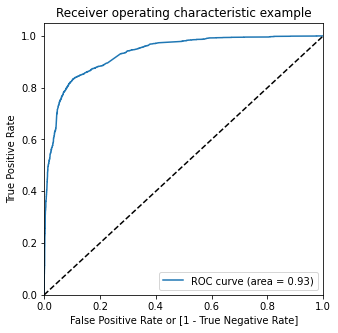

In [70]:
draw_roc(y_train_pred_final.Act_Conv, y_train_pred_final.Prob_of_Conv)

In [71]:
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Prob_of_Conv.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Act_Conv,Prob_of_Conv,Conv_val,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.002409,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.449341,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.002943,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.158339,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.244908,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0.976907,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,0,0.002829,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0.999684,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,0,0.334888,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9,1,0.979376,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [72]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Act_Conv, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,round(accuracy*100,1),round(sensi*100,1),round(speci*100,1)]
print(cutoff_df)

      Probability  Accuracy  Sensitivity  Specificity
0.00         0.00      38.1        100.0          0.0
0.05         0.05      65.4         98.7         44.9
0.10         0.10      73.9         97.3         59.4
0.15         0.15      77.4         95.1         66.4
0.20         0.20      79.2         94.2         70.0
0.25         0.25      82.3         89.4         77.8
0.30         0.30      84.4         87.4         82.5
0.35         0.35      85.9         85.1         86.5
0.40         0.40      87.2         83.5         89.5
0.45         0.45      87.4         81.7         91.0
0.50         0.50      87.4         80.0         91.9
0.55         0.55      87.4         78.2         93.1
0.60         0.60      87.1         76.2         93.8
0.65         0.65      86.7         73.8         94.6
0.70         0.70      85.9         70.4         95.4
0.75         0.75      82.9         60.9         96.5
0.80         0.80      81.4         55.0         97.6
0.85         0.85      79.9 

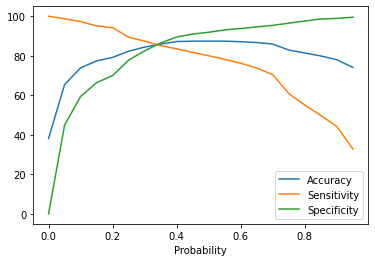

In [73]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [74]:
y_train_pred_final['Conv_val_final'] = y_train_pred_final.Prob_of_Conv.map(lambda x: 1 if x > 0.37 else 0)

In [75]:
confusion = metrics.confusion_matrix(y_train_pred_final.Act_Conv, y_train_pred_final.Conv_val_final)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("The confusion matrix is: ",confusion)

# Actual/Predicted     not_churn    churn
# not_churn              
# churn                 
print()
print()
print()

#Overall Accuracy of the model
print("Overall Accuracy of the model is: ",round(metrics.accuracy_score(y_train_pred_final.Act_Conv, y_train_pred_final.Conv_val_final)*100,1))

# Sensitivity of our logistic regression model
print("Sensitivity/Recall of the model is: ",round(TP / float(TP+FN)*100,2))

# specificity
print("Specificity of the model is:", round(TN / float(TN+FP)*100,2))


# False postive rate
print("False positive rate of the model is: ",round(((FP/ float(TN+FP))*100),2))

# Positive predictive value 
print("Positive Predictive/Precision rate of the model is: ",round(TP / float(TP+FP)*100,2))

# Negative predictive value
print("Negative Predictive rate of the model is: ",round(TN / float(TN+ FN)*100,2))

The confusion matrix is:  [[3512  490]
 [ 383 2083]]



Overall Accuracy of the model is:  86.5
Sensitivity/Recall of the model is:  84.47
Specificity of the model is: 87.76
False positive rate of the model is:  12.24
Positive Predictive/Precision rate of the model is:  80.96
Negative Predictive rate of the model is:  90.17


In [76]:
print("The Precision value of the model is: ",round(precision_score(y_train_pred_final.Act_Conv, y_train_pred_final.Conv_val_final)*100,2))
print("The Recall value of the model is: ",round(recall_score(y_train_pred_final.Act_Conv, y_train_pred_final.Conv_val_final)*100,2))

The Precision value of the model is:  80.96
The Recall value of the model is:  84.47


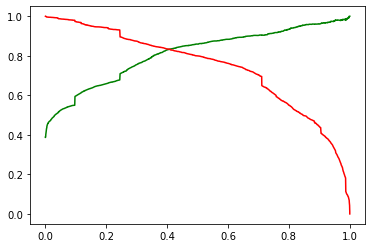

In [77]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Act_Conv, y_train_pred_final.Prob_of_Conv)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Model Evaluation

# Model -3  Evaluation based on Results

In [78]:
X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit',"Asymmetrique_Activity_Score","Asymmetrique_Profile_Score"]] = scaler.transform(X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit',"Asymmetrique_Activity_Score","Asymmetrique_Profile_Score"]])

In [79]:
# col = col.drop('Lead_Profile_Others', 1)
# col = col.drop('Tags_Ringing', 1)
col = col.drop('Tags_switched off', 1)

In [80]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [81]:
y_test_pred[:10]

4269    0.943464
2376    0.986248
7766    0.279302
9199    0.001775
4359    0.904431
9186    0.886830
1631    0.688512
8963    0.350184
8007    0.171012
5324    0.768960
dtype: float64

In [82]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [83]:
y_pred_1.head()

,0
4269,0.943464
2376,0.986248
7766,0.279302
9199,0.001775
4359,0.904431


In [84]:
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [85]:
y_test_df['Prospect ID'] = y_test_df.index

In [86]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [87]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.943464
1,1,2376,0.986248
2,1,7766,0.279302
3,0,9199,0.001775
4,1,4359,0.904431


In [88]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Prob_of_Conv'})

In [89]:
# y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Prob_of_Conv'], axis=1)

In [90]:
y_pred_final['Conv_val'] = y_pred_final.Prob_of_Conv.map(lambda x: 1 if x > 0.37 else 0)

In [91]:
y_pred_final['Lead_Score'] = y_pred_final.Prob_of_Conv.map(lambda x: round(x*100))

In [92]:
y_pred_final.head()

,Converted,Prospect ID,Prob_of_Conv,Conv_val,Lead_Score
0,1,4269,0.943464,1,94
1,1,2376,0.986248,1,99
2,1,7766,0.279302,0,28
3,0,9199,0.001775,0,0
4,1,4359,0.904431,1,90


In [93]:
confusion_m = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Conv_val)
TP = confusion_m[1,1] # true positive 
TN = confusion_m[0,0] # true negatives
FP = confusion_m[0,1] # false positives
FN = confusion_m[1,0] # false negatives
print('Confusion Matrix: ',confusion_m)
print()

# Overall accuracy.
print("Overall Accuracy of the model is: ",round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Conv_val)*100,1))

# Sensitivity of our logistic regression model
print("Sensitivity/Recall of the model is: ",round(TP / float(TP+FN)*100,2))

# Specificity
print("Specificity of the model is:", round(TN / float(TN+FP)*100,2))


# False postive rate
print("False positive rate of the model is: ",round(((FP/ float(TN+FP))*100),2))

# Positive predictive value 
print("Positive Predictive/Precision rate of the model is: ",round(TP / float(TP+FP)*100,2))

# Negative predictive value
print("Negative Predictive rate of the model is: ",round(TN / float(TN+ FN)*100,2))

Confusion Matrix:  [[1447  230]
 [ 163  932]]

Overall Accuracy of the model is:  85.8
Sensitivity/Recall of the model is:  85.11
Specificity of the model is: 86.29
False positive rate of the model is:  13.71
Positive Predictive/Precision rate of the model is:  80.21
Negative Predictive rate of the model is:  89.88


In [94]:
print("The Precision of the Final Model is: ",round(precision_score(y_pred_final.Converted , y_pred_final.Conv_val)*100,2))
print("The Recall of the Final Model is: ",round(recall_score(y_pred_final.Converted, y_pred_final.Conv_val)*100,2))

The Precision of the Final Model is:  80.21
The Recall of the Final Model is:  85.11
